# MOVIE RATING PREDICTION WITH PYTHON


         Name : SRIGUHAN C.V
         Task no. : 2
         Topic : MOVIE RATING PREDICTION WITH PYTHON
         Domain : Data Science
         Batch : SEPT BATCH P6

#     Importing packages

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Loading movies data
    
        CSV file is loaded using read_csv function available in pandas library

In [56]:
movies = pd.read_csv(r'movies.csv')

In [57]:
movies

,Movie IDs,Movies,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# Pie plot with respect to Genre

<Axes: ylabel='Genre'>

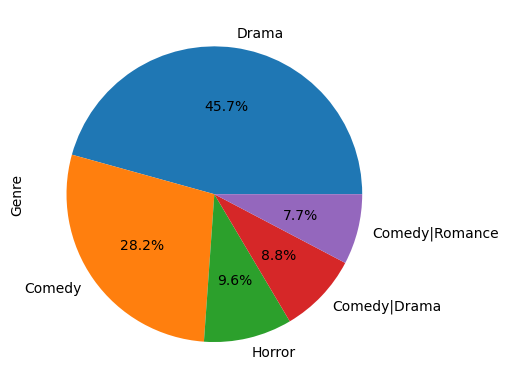

In [70]:
movies['Genre'].value_counts().head().plot(kind = 'pie',autopct = '%1.1f%%')

    - Drama genre movies have the highest number of count value and constitutes to almost half of the pie chart

# Movies datatype information

In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie IDs  3883 non-null   int64 
 1   Movies     3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [77]:
movies.shape

(3883, 3)

# Loading ratings data

In [58]:
ratings = pd.read_csv(r'ratings.csv')

In [59]:
ratings

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [63]:
ratings.shape

(1000209, 4)

In [64]:
ratings.head()

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# Pie plot with respect to Ratings

<Axes: ylabel='Ratings'>

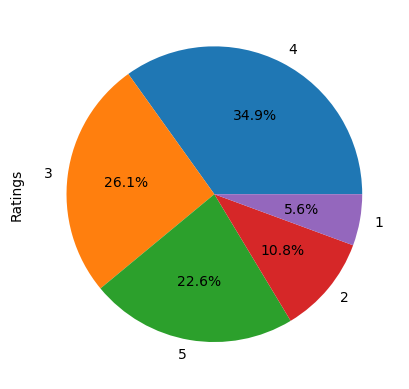

In [71]:
ratings['Ratings'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

    - The most number of ratings given was 4 followed by 5 

# Ratings datatype information

In [78]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


# Loading users data

In [61]:
users = pd.read_csv(r'users.csv')

In [62]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


# Bar plot depicting Gender and corresponding no. of users

<Axes: xlabel='Gender', ylabel='No. of users'>

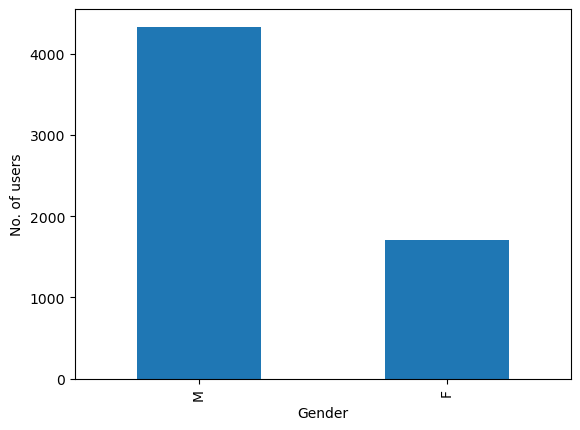

In [74]:
users['Gender'].value_counts().plot(kind = 'bar',xlabel = 'Gender',ylabel = 'No. of users')

    - Males have a higher count than women when it comes to rating a movie

In [79]:
users.shape

(6040, 5)

# Users datatype information

In [80]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


# Converting Gender into 1s and 0s using labelencoder

    - With the help of LabelEncoder() the categorical data is converted into ordinal data(1s and 0s)

In [90]:
labelencoder = LabelEncoder()
users['Gender'] = labelencoder.fit_transform(users['Gender'])

In [91]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,2460
4,5,1,25,20,55455
...,...,...,...,...,...
6035,6036,0,25,15,32603
6036,6037,0,45,1,76006
6037,6038,0,56,1,14706
6038,6039,0,45,0,1060


# Statistical information

    - Using the describe function all the statistical information regarding the Ratings data is found out

In [84]:
ratings['Ratings'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Ratings, dtype: float64

In [85]:
ratings['Ratings'].isnull().value_counts()

False    1000209
Name: Ratings, dtype: int64

# Concatenation

    - Since data is present in 3 different dataframes we need to concatenate all the 3 into single dataframe

In [92]:
df_new = pd.concat([movies,ratings,users],axis=1)

# Removing null values

    - Null values are removed using dropna() function

In [96]:
df_new.dropna()

,Movie IDs,Movies,Genre,UserID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,2460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948.0,Meet the Parents (2000),Comedy,28,334,4,978125960,3879.0,1.0,25.0,3.0,83687
3879,3949.0,Requiem for a Dream (2000),Drama,28,266,2,978982323,3880.0,1.0,25.0,7.0,54942
3880,3950.0,Tigerland (2000),Drama,28,2174,3,978126491,3881.0,1.0,18.0,2.0,44515
3881,3951.0,Two Family House (2000),Drama,28,912,5,978985294,3882.0,1.0,56.0,14.0,55337


In [97]:
df_new.head()

,Movie IDs,Movies,Genre,UserID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,2460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455


In [98]:
df_new.shape

(1000209, 12)

# Removing unwanted features

    - Unwanted features those doesn't contribute to model training are removed using drop().

In [103]:
data = df_new.drop(["Occupation","Zip-code","Timestamp"],axis = 1)

In [108]:
data_final = data.dropna()
data_final

,Movie IDs,Movies,Genre,UserID,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...
3878,3948.0,Meet the Parents (2000),Comedy,28,334,4,3879.0,1.0,25.0
3879,3949.0,Requiem for a Dream (2000),Drama,28,266,2,3880.0,1.0,25.0
3880,3950.0,Tigerland (2000),Drama,28,2174,3,3881.0,1.0,18.0
3881,3951.0,Two Family House (2000),Drama,28,912,5,3882.0,1.0,56.0


In [109]:
data_final.shape

(3883, 9)

# Countplot

    - countplot is created with ratings as hue 
    - '0' represents females and '1' represent males
    - Y axis denotes the count value for Ratings

<Axes: xlabel='Gender', ylabel='count'>

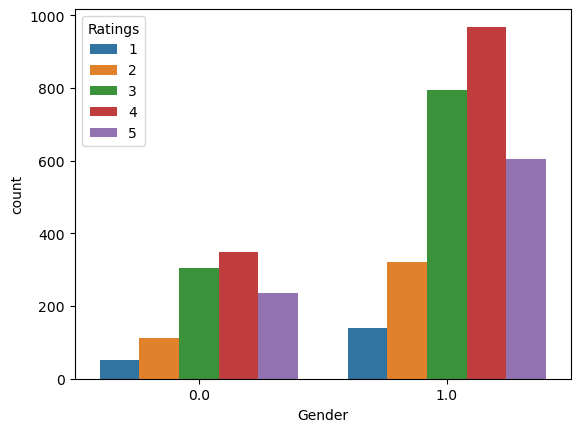

In [111]:
sns.countplot(x = data_final['Gender'],hue = data_final['Ratings'])

    - Males have rated more compared to females

# Countplot 

    - countplot is created for Age and Ratings

<Axes: xlabel='Age', ylabel='count'>

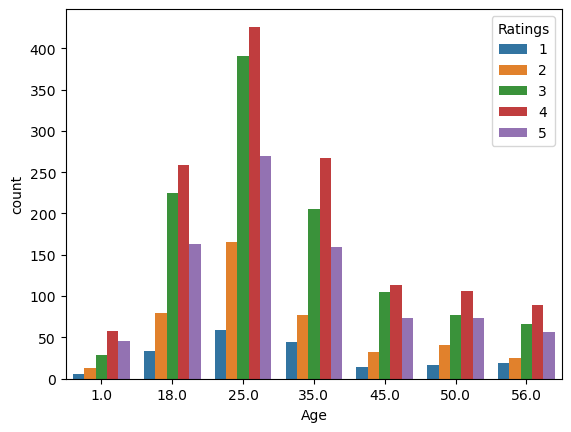

In [118]:
sns.countplot(x = data_final['Age'], hue = data_final['Ratings'])

    - Users between 18 - 35 have rated the most 

In [119]:
data_final.head()

,Movie IDs,Movies,Genre,UserID,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


# Splitting the dataframe

    - input has all the features except Ratings
    - output has only Ratings feature

In [136]:
input = data_final.drop(['Movie IDs','Movies','Genre','Ratings'],axis = 1)

In [121]:
output = data_final['Ratings']

In [122]:
input.head()

,UserID,MovieID,UserID,Gender,Age
0,1,1193,1.0,0.0,1.0
1,1,661,2.0,1.0,56.0
2,1,914,3.0,1.0,25.0
3,1,3408,4.0,1.0,45.0
4,1,2355,5.0,1.0,25.0


In [123]:
output.head()

0    5
1    3
2    3
3    4
4    5
Name: Ratings, dtype: int64

# Scaling the dataframe

    - The input dataframe is scaled using MinMaxScaler() to rescale the values between 0 - 1, due to which accuracy of the 
    model can be improved.

In [174]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,columns = input.columns)

In [175]:
scaled_df.head()

,UserID,MovieID,UserID,Gender,Age
0,0.0,0.301696,0.000000,0.0,0.000000
1,0.0,0.167046,0.000258,1.0,1.000000
2,0.0,0.231081,0.000515,1.0,0.436364
3,0.0,0.862313,0.000773,1.0,0.800000
4,0.0,0.595799,0.001030,1.0,0.436364


# Data splitting
    - X_train variable is used for fitting the data in modelling and training the data.
    - X_test variable is used to access the test results after the training is completed.
    - Similarly for Y_train and Y_test.
    - test_size attribute will determine how much data to be provided to train and test.

In [165]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_df,output,test_size=0.3)

In [166]:
Y_train

953     4
3239    4
431     3
2303    4
529     5
       ..
2455    4
2986    4
1442    3
3324    4
2605    2
Name: Ratings, Length: 2718, dtype: int64

In [167]:
Y_test

2917    2
720     2
1668    3
3356    5
3830    4
       ..
1220    3
1311    5
1447    3
540     5
309     4
Name: Ratings, Length: 1165, dtype: int64

# Logistic  Regression

    - Model variable is created with LogisticRegression function

In [168]:
Reg_model = LogisticRegression()
Reg_model.fit(X_train,Y_train)

LogisticRegression()

# Model prediction

In [178]:
Reg_model.predict(X_test)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [176]:
print(Y_test)

2917    2
720     2
1668    3
3356    5
3830    4
       ..
1220    3
1311    5
1447    3
540     5
309     4
Name: Ratings, Length: 1165, dtype: int64
